In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

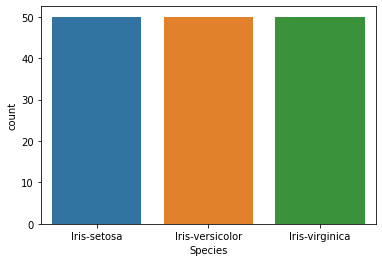

In [5]:
sns.countplot(x='Species', data=df)
df.loc[:,'Species'].value_counts()

In [13]:
X = df.iloc[:, [1, 2, 3, 4]].values

C:\Users\Code\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


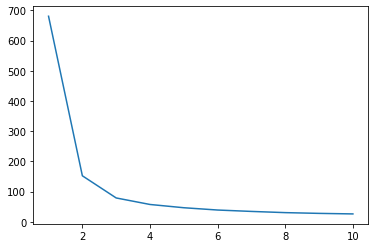

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

In [15]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279
For n_clusters = 6 The average silhouette_score is : 0.37121805054590074
For n_clusters = 7 The average silhouette_score is : 0.36005979973284596
For n_clusters = 8 The average silhouette_score is : 0.3603749708042154
For n_clusters = 9 The average silhouette_score is : 0.3139310239112049


In [16]:
kmeans.cluster_centers_

array([[5.1       , 3.45      , 1.51111111, 0.28333333],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.615     , 2.64      , 4.005     , 1.225     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.63333333, 3.03333333, 4.63333333, 1.45833333],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [5.39166667, 3.925     , 1.525     , 0.275     ],
       [5.96153846, 2.87692308, 4.51538462, 1.44615385],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.03529412, 2.70588235, 5.04117647, 1.79411765]])

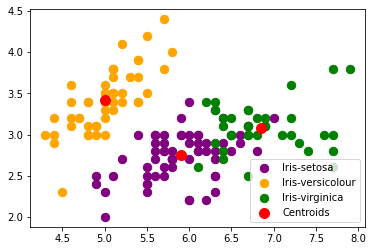

In [19]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
y_kmeans= kmeans.fit_predict(X)


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


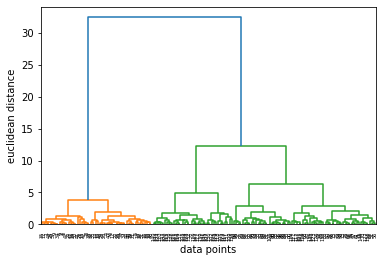

In [20]:
merg = linkage(X,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

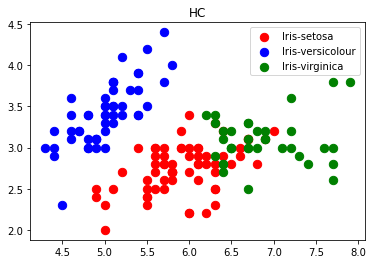

In [26]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X)

plt.scatter(X[hc_predict==0,0],X[hc_predict==0,1],s=70, c='red', label = 'Iris-setosa')
plt.scatter(X[hc_predict==1,0],X[hc_predict==1,1],s=70, c='blue',label = 'Iris-versicolour')
plt.scatter(X[hc_predict==2,0],X[hc_predict==2,1],s=70, c='green',label = 'Iris-virginica')
plt.legend()
plt.title('HC')
plt.show()